Visualize the initial graph

In [36]:
import rdflib
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from pyshacl import validate

Load the RDF data from the ttl file and define namespaces.

In [37]:
graph = rdflib.Graph()
graph.parse("family_rdf.ttl", format="turtle")

#NetworkX directed graph
G = nx.DiGraph()

FOAF = rdflib.Namespace("http://xmlns.com/foaf/0.1/")
FAM = rdflib.Namespace("http://example.org/family#")


Iterate over the triples in the RDF graph, add the given relationships to the graph

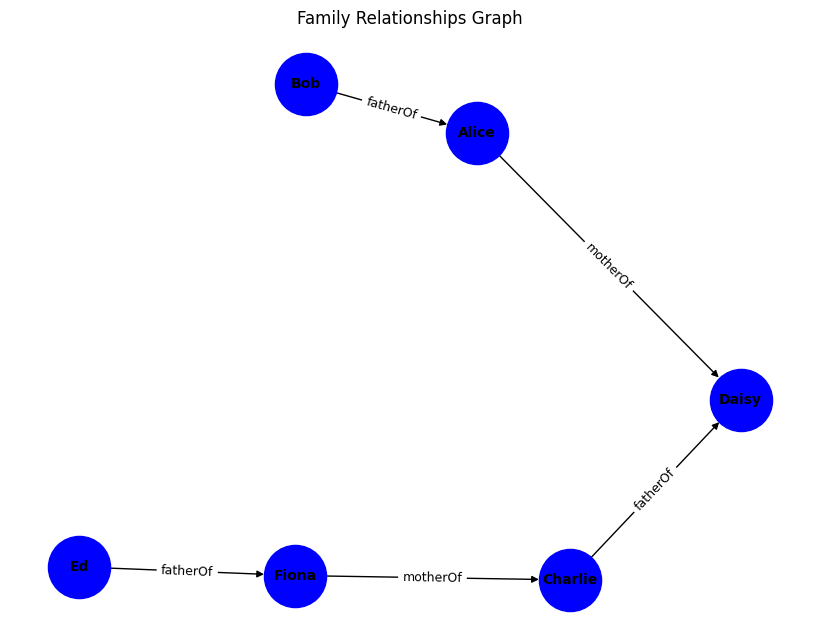

In [44]:
def get_label(node):
    name = graph.value(node, FOAF.name)
    return str(name) if name else str(node)

for subj, pred, obj in graph:
    if pred == FAM.fatherOf:
        G.add_edge(get_label(subj), get_label(obj), label="fatherOf")
    elif pred == FAM.motherOf:
        G.add_edge(get_label(subj), get_label(obj), label="motherOf")

plt.figure(figsize = (8, 6))
pos = nx.spring_layout(G) 

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels = True, node_size = 2000, node_color = "blue", font_size = 10, font_weight = "bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_size = 9)

plt.title("Family Relationships Graph")
plt.show()
